In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

# Partie 1 : Prétraitement des images 

In [3]:
import os

races = os.listdir('Images')

In [4]:
len(races)

120

In [5]:
number = []

for name in races:
    test = os.listdir('Images/' + name)
    number.append(len(test))

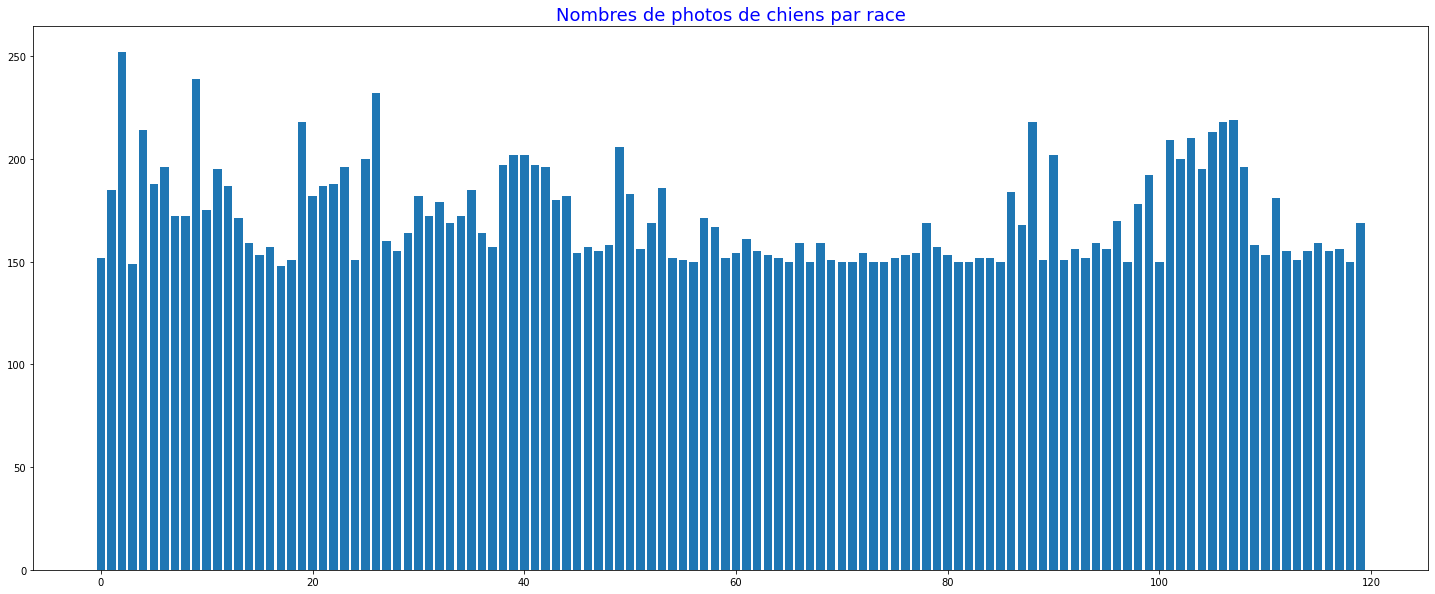

In [6]:
fig = plt.figure(figsize=(25, 10))
plt.title("Nombres de photos de chiens par race",
          fontsize=18,
          color="b")
plt.bar(range(120), number)
plt.show()

## Taille de l'image

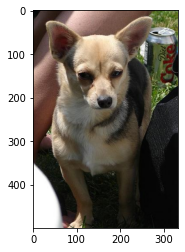

In [7]:
from PIL import Image

# Charger l'image
img = Image.open('Images/n02085620-Chihuahua/n02085620_10074.jpg')

# Afficher l'image chargée
plt.imshow(img)

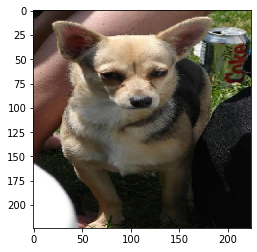

In [8]:
# Charger l'image
img = load_img('Images/n02085620-Chihuahua/n02085620_10074.jpg',
               target_size=(224, 224))

# Afficher l'image chargée
plt.imshow(img)

## Modification de l'histogramme

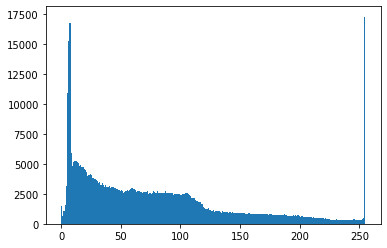

In [9]:
# Charger l'image comme matrice de pixels
img = np.array(Image.open('Images/n02085620-Chihuahua/n02085620_10074.jpg'))

# Générer et afficher l'histogramme
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True
n, bins, patches = plt.hist(img.flatten(), bins=range(256))
plt.show()

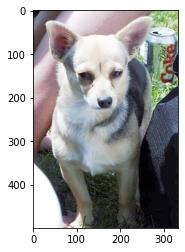

In [10]:
# Importing Image and ImageOps module from PIL package
from PIL import Image, ImageOps

# creating a image1 object
im1 = Image.open('Images/n02085620-Chihuahua/n02085620_10074.jpg')

# applying equalize method
im2 = ImageOps.equalize(im1, mask=None)

plt.imshow(im2)

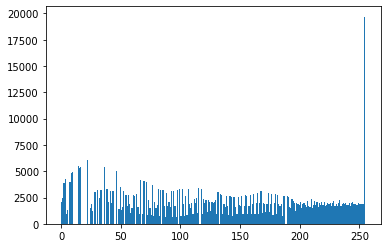

In [11]:
# Charger l'image comme matrice de pixels
img2 = np.array(im2)

n, bins, patches = plt.hist(img2.flatten(), bins=range(256))
plt.show()

## Application de filtre

In [12]:
import cv2 as cv

im3 = cv.fastNlMeansDenoisingColored(src=img, dst=None,
                                     h=10,
                                     hColor=10,
                                     templateWindowSize=7,
                                     searchWindowSize=21)

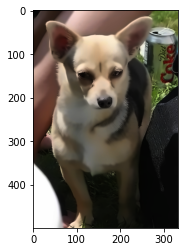

In [13]:
plt.imshow(im3)

## Data Augmentation

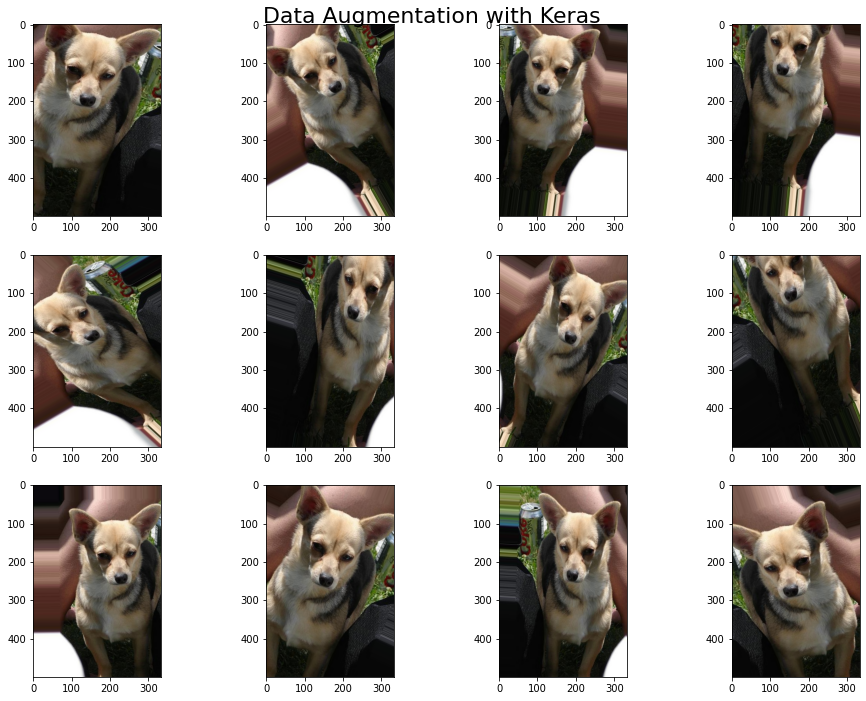

In [14]:
# Initilize Data Generator Keras
augmented_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Convert test img to array
x = img_array = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
fig = plt.figure(figsize=(16, 12))
for batch in augmented_datagen.flow(x, batch_size=1):
    ax = fig.add_subplot(3, 4, i+1)
    plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 12 == 0:
        break

plt.suptitle("Data Augmentation with Keras",
             color="black",
             fontsize=22, y=.90)
plt.show()

# Partie 2 : Prétraitement de l'ensemble des photos

In [15]:
def preprocessing_cnn(directories):

    img_list = []
    labels = []
    for index, breed in tqdm(enumerate(directories)):
        for image_name in os.listdir("Images/"+breed):

            img = load_img("Images/"+breed+"/"+image_name,
                           target_size=(224, 224))

            img = ImageOps.equalize(img, mask=None)

            img_array = np.array(img)

            img_array = cv.fastNlMeansDenoisingColored(src=img_array, dst=None)

            img_list.append(np.array(img_array))
            labels.append(breed.split("-")[1])

    return img_list, labels

In [16]:
fr_breed_list = [
    'n02085620-Chihuahua',
    'n02085782-Japanese_spaniel',
    'n02085936-Maltese_dog',
    'n02086079-Pekinese',
    'n02086240-Shih-Tzu',
    'n02086646-Blenheim_spaniel',
    'n02086910-papillon',
    'n02087046-toy_terrier',
    'n02087394-Rhodesian_ridgeback',
    'n02088094-Afghan_hound',
    'n02088238-basset',
    'n02088364-beagle',
    'n02088466-bloodhound',
    'n02088632-bluetick',
    'n02089078-black-and-tan_coonhound',
    'n02089867-Walker_hound',
    'n02089973-English_foxhound',
    'n02090379-redbone',
    'n02090622-borzoi',
    'n02090721-Irish_wolfhound',
    'n02091032-Italian_greyhound',
    'n02091134-whippet',
    'n02091244-Ibizan_hound',
    'n02091467-Norwegian_elkhound',
    'n02091635-otterhound',
    'n02091831-Saluki',
    'n02092002-Scottish_deerhound',
    'n02092339-Weimaraner',
    'n02093256-Staffordshire_bullterrier',
    'n02093428-American_Staffordshire_terrier',
    'n02093647-Bedlington_terrier',
    'n02093754-Border_terrier',
    'n02093859-Kerry_blue_terrier',
    'n02093991-Irish_terrier',
    'n02094114-Norfolk_terrier',
    'n02094258-Norwich_terrier',
    'n02094433-Yorkshire_terrier',
    'n02095314-wire-haired_fox_terrier',
    'n02095570-Lakeland_terrier',
    'n02095889-Sealyham_terrier',
    'n02096051-Airedale',
    'n02096177-cairn',
    'n02096294-Australian_terrier',
    'n02096437-Dandie_Dinmont',
    'n02096585-Boston_bull',
    'n02097047-miniature_schnauzer',
    'n02097130-giant_schnauzer',
    'n02097209-standard_schnauzer',
    'n02097298-Scotch_terrier',
    'n02097474-Tibetan_terrier',
    'n02097658-silky_terrier',
    'n02098105-soft-coated_wheaten_terrier',
    'n02098286-West_Highland_white_terrier',
    'n02098413-Lhasa',
    'n02099267-flat-coated_retriever',
    'n02099429-curly-coated_retriever',
    'n02099601-golden_retriever',
    'n02099712-Labrador_retriever',
    'n02099849-Chesapeake_Bay_retriever',
    'n02100236-German_short-haired_pointer',
    'n02100583-vizsla',
    'n02100735-English_setter',
    'n02100877-Irish_setter',
    'n02101006-Gordon_setter',
    'n02101388-Brittany_spaniel',
    'n02101556-clumber',
    'n02102040-English_springer',
    'n02102177-Welsh_springer_spaniel',
    'n02102318-cocker_spaniel',
    'n02102480-Sussex_spaniel',
    'n02102973-Irish_water_spaniel',
    'n02104029-kuvasz',
    'n02104365-schipperke',
    'n02105056-groenendael',
    'n02105162-malinois',
    'n02105251-briard',
    'n02105412-kelpie',
    'n02105505-komondor',
    'n02105641-Old_English_sheepdog',
    'n02105855-Shetland_sheepdog',
    'n02106030-collie',
    'n02106166-Border_collie',
    'n02106382-Bouvier_des_Flandres',
    'n02106550-Rottweiler',
    'n02106662-German_shepherd',
    'n02107142-Doberman',
    'n02107312-miniature_pinscher',
    'n02107574-Greater_Swiss_Mountain_dog',
    'n02107683-Bernese_mountain_dog',
    'n02107908-Appenzeller',
    'n02108000-EntleBucher',
    'n02108089-boxer',
    'n02108422-bull_mastiff',
    'n02108551-Tibetan_mastiff',
    'n02108915-French_bulldog',
    'n02109047-Great_Dane',
    'n02109525-Saint_Bernard',
    'n02109961-Eskimo_dog',
    'n02110063-malamute',
    'n02110185-Siberian_husky',
    'n02110627-affenpinscher',
    'n02110806-basenji',
    'n02110958-pug',
    'n02111129-Leonberg',
    'n02111277-Newfoundland',
    'n02111500-Great_Pyrenees',
    'n02111889-Samoyed',
    'n02112018-Pomeranian',
    'n02112137-chow',
    'n02112350-keeshond',
    'n02112706-Brabancon_griffon',
    'n02113023-Pembroke',
    'n02113186-Cardigan',
    'n02113624-toy_poodle',
    'n02113712-miniature_poodle',
    'n02113799-standard_poodle',
    'n02113978-Mexican_hairless',
    'n02115641-dingo',
    'n02115913-dhole',
    'n02116738-African_hunting_dog']

In [17]:
# Define numbers of breeds to preprocess
num_breeds = len(fr_breed_list)

In [18]:
import cv2 as cv
from tqdm import tqdm

# X = images
# y = labels
X, y = preprocessing_cnn(fr_breed_list)
# Convert in numpy array
X = np.array(X)
y = np.array(y)

print("Number of images preprocessed : {}"
      .format(len(y)))
print("Shape of images np.array : {}"
      .format(X.shape))

NameError: name 'tqdm' is not defined

In [18]:
import pickle

infile = open("save.p", "rb")
Donnees = pickle.load(infile)
infile.close()

In [19]:
infile = open("values_2.p", "rb")
values = pickle.load(infile)
infile.close()

In [20]:
X = Donnees['Photos']
y = Donnees['Label']

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
y_binarized = encoder.transform(y)

In [22]:
from sklearn.model_selection import train_test_split

# Create train and test set
x_train, x_test, y_train, y_test = train_test_split(
    X, y_binarized, test_size=0.1, random_state=42)

print("-" * 50)
print("Size of created sets :")
print("-" * 50)
print("Train set size = ", x_train.shape[0])
print("Test set size = ", x_test.shape[0])

--------------------------------------------------
Size of created sets :
--------------------------------------------------
Train set size =  18522
Test set size =  2058


In [23]:
# Create train and test set
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42)

print("-" * 50)
print("Size of created sets :")
print("-" * 50)
print("Train set size = ", x_train.shape[0])
print("Test set size = ", x_val.shape[0])

--------------------------------------------------
Size of created sets :
--------------------------------------------------
Train set size =  16669
Test set size =  1853


# Partie 3 : Réseau de neuronnes personnel 

In [24]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.models import load_model

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense

In [36]:
train_datagen = ImageDataGenerator(rotation_range=40, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, horizontal_flip=True, fill_mode="nearest")
val_datagen = ImageDataGenerator()

In [26]:
def create_model():
    return tf.keras.models.Sequential([
        Conv2D(filters=16,
               kernel_size=(3, 3),
               padding='same',
               use_bias=False,
               input_shape=(224, 224, 3)),
        BatchNormalization(axis=3, scale=False),
        Activation('relu'),
        MaxPooling2D(pool_size=(4, 4),
                     strides=(4, 4),
                     padding='same'),
        Conv2D(filters=32,
               kernel_size=(3, 3),
               padding='same',
               use_bias=False),
        BatchNormalization(axis=3, scale=False),
        Activation('relu'),
        MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'),
        Dropout(0.2),
        Conv2D(filters=64,
               kernel_size=(3, 3),
               padding='same',
               use_bias=False),
        BatchNormalization(axis=3, scale=False),
        Activation('relu'),
        GlobalAveragePooling2D(),
        Dense(1024, activation='relu'),
        Dropout(0.2),
        Dense(512, activation='relu'),
        Dense(num_breeds, activation='softmax')
    ])

In [27]:
import datetime

In [28]:
model = create_model()

learning_rate = 1e-4
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(
    learning_rate=learning_rate), metrics=["accuracy"])

fit_cnn = model.fit(train_datagen.flow(x_train, y_train, batch_size=8),
                    epochs=20,
                    validation_data=val_datagen.flow(
                        x_val, y_val, batch_size=8),
                    shuffle=True,
                    verbose=2)

Epoch 1/20
2084/2084 - 115s - loss: 4.7589 - accuracy: 0.0151 - val_loss: 4.7497 - val_accuracy: 0.0151 - 115s/epoch - 55ms/step
Epoch 2/20
2084/2084 - 111s - loss: 4.7006 - accuracy: 0.0207 - val_loss: 4.7028 - val_accuracy: 0.0270 - 111s/epoch - 53ms/step
Epoch 3/20
2084/2084 - 102s - loss: 4.6236 - accuracy: 0.0284 - val_loss: 4.5889 - val_accuracy: 0.0367 - 102s/epoch - 49ms/step
Epoch 4/20
2084/2084 - 103s - loss: 4.5490 - accuracy: 0.0338 - val_loss: 4.5240 - val_accuracy: 0.0378 - 103s/epoch - 49ms/step
Epoch 5/20
2084/2084 - 109s - loss: 4.4827 - accuracy: 0.0387 - val_loss: 4.4470 - val_accuracy: 0.0378 - 109s/epoch - 52ms/step
Epoch 6/20
2084/2084 - 110s - loss: 4.4455 - accuracy: 0.0428 - val_loss: 4.4953 - val_accuracy: 0.0383 - 110s/epoch - 53ms/step
Epoch 7/20
2084/2084 - 108s - loss: 4.4028 - accuracy: 0.0431 - val_loss: 4.4030 - val_accuracy: 0.0486 - 108s/epoch - 52ms/step
Epoch 8/20
2084/2084 - 113s - loss: 4.3725 - accuracy: 0.0491 - val_loss: 4.4006 - val_accuracy: 

In [31]:
import keras_tuner as kt

In [32]:
def model_builder(hp):
    model = keras.Sequential()
    model.add(Conv2D(filters=16,
                     kernel_size=(3, 3),
                     padding='same',
                     use_bias=False,
                     input_shape=(224, 224, 3)))
    model.add(BatchNormalization(axis=3, scale=False))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(4, 4),
                           strides=(4, 4),
                           padding='same'))
    model.add(Conv2D(filters=32,
                     kernel_size=(3, 3),
                     padding='same',
                     use_bias=False))
    model.add(BatchNormalization(axis=3, scale=False))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'))

    model.add(Dropout(0.2))

    model.add(Conv2D(filters=64,
                     kernel_size=(3, 3),
                     padding='same',
                     use_bias=False))
    model.add(BatchNormalization(axis=3, scale=False))
    model.add(Activation('relu'))
    model.add(GlobalAveragePooling2D())

    hp_units = hp.Int('units', min_value=256, max_value=512, step=128)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))

    model.add(
        Dropout(rate=hp.Float(
                'dropout_2',
                min_value=0.0,
                max_value=0.3,
                step=0.1,
                )))

    hp_units_2 = hp.Int('units_2', min_value=128, max_value=256, step=128)
    model.add(keras.layers.Dense(units=hp_units_2, activation='relu'))

    model.add(Dense(num_breeds, activation='softmax'))

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss=keras.losses.SparseCategoricalCrossentropy(
                      from_logits=True),
                  metrics=['accuracy'])

    return model

In [33]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10)

In [34]:
stop_early = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', patience=5)

In [37]:
tuner.search(train_datagen.flow(x_train, y_train, batch_size=8),
             epochs=50,
             validation_data=val_datagen.flow(x_val, y_val, batch_size=8),
             callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 22m 03s]
val_accuracy: 0.058283865451812744

Best val_accuracy So Far: 0.059363193809986115
Total elapsed time: 04h 00m 53s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 384 and the optimal learning rate for the optimizer
is 0.001.



In [38]:
best_hps.values

{'units': 384,
 'dropout_2': 0.30000000000000004,
 'units_2': 128,
 'learning_rate': 0.001,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [39]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_datagen.flow(x_train, y_train, batch_size=8), epochs=50, validation_data=val_datagen.flow(x_val, y_val, batch_size=8),
                    shuffle=True,
                    verbose=2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
2084/2084 - 165s - loss: 4.7566 - accuracy: 0.0164 - val_loss: 4.6955 - val_accuracy: 0.0210 - 165s/epoch - 79ms/step
Epoch 2/50
2084/2084 - 176s - loss: 4.6896 - accuracy: 0.0203 - val_loss: 4.6887 - val_accuracy: 0.0200 - 176s/epoch - 85ms/step
Epoch 3/50
2084/2084 - 183s - loss: 4.6322 - accuracy: 0.0227 - val_loss: 4.6192 - val_accuracy: 0.0275 - 183s/epoch - 88ms/step
Epoch 4/50
2084/2084 - 184s - loss: 4.5872 - accuracy: 0.0254 - val_loss: 4.8114 - val_accuracy: 0.0173 - 184s/epoch - 88ms/step
Epoch 5/50
2084/2084 - 182s - loss: 4.5277 - accuracy: 0.0305 - val_loss: 4.6156 - val_accuracy: 0.0286 - 182s/epoch - 87ms/step
Epoch 6/50
2084/2084 - 177s - loss: 4.4535 - accuracy: 0.0385 - val_loss: 4.4624 - val_accuracy: 0.0297 - 177s/epoch - 85ms/step
Epoch 7/50
2084/2084 - 180s - loss: 4.4058 - accuracy: 0.0448 - val_loss: 4.6083 - val_accuracy: 0.0329 - 180s/epoch - 86ms/step
Epoch 8/50
2084/2084 - 115s - loss: 4.3650 - accuracy: 0.0462 - val_loss: 4.3193 - val_accuracy: 

In [40]:
hypermodel_cnn = tuner.hypermodel.build(best_hps)

# Retrain the model
CNN = hypermodel_cnn.fit(train_datagen.flow(x_train, y_train, batch_size=8),
                         epochs=best_epoch, validation_data=val_datagen.flow(x_val, y_val, batch_size=8))

Epoch 1/46
2084/2084 [==============================] - 126s 60ms/step - loss: 4.7620 - accuracy: 0.0155 - val_loss: 4.7113 - val_accuracy: 0.0205
Epoch 2/46
2084/2084 [==============================] - 121s 58ms/step - loss: 4.6900 - accuracy: 0.0195 - val_loss: 4.6875 - val_accuracy: 0.0237
Epoch 3/46
2084/2084 [==============================] - 126s 61ms/step - loss: 4.6180 - accuracy: 0.0237 - val_loss: 4.5631 - val_accuracy: 0.0329
Epoch 4/46
2084/2084 [==============================] - 121s 58ms/step - loss: 4.5654 - accuracy: 0.0290 - val_loss: 4.8025 - val_accuracy: 0.0210
Epoch 5/46
2084/2084 [==============================] - 121s 58ms/step - loss: 4.5086 - accuracy: 0.0299 - val_loss: 4.5382 - val_accuracy: 0.0345
Epoch 6/46
2084/2084 [==============================] - 154s 74ms/step - loss: 4.4495 - accuracy: 0.0370 - val_loss: 4.5293 - val_accuracy: 0.0335
Epoch 7/46
2084/2084 [==============================] - 126s 61ms/step - loss: 4.4017 - accuracy: 0.0427 - val_loss: 4

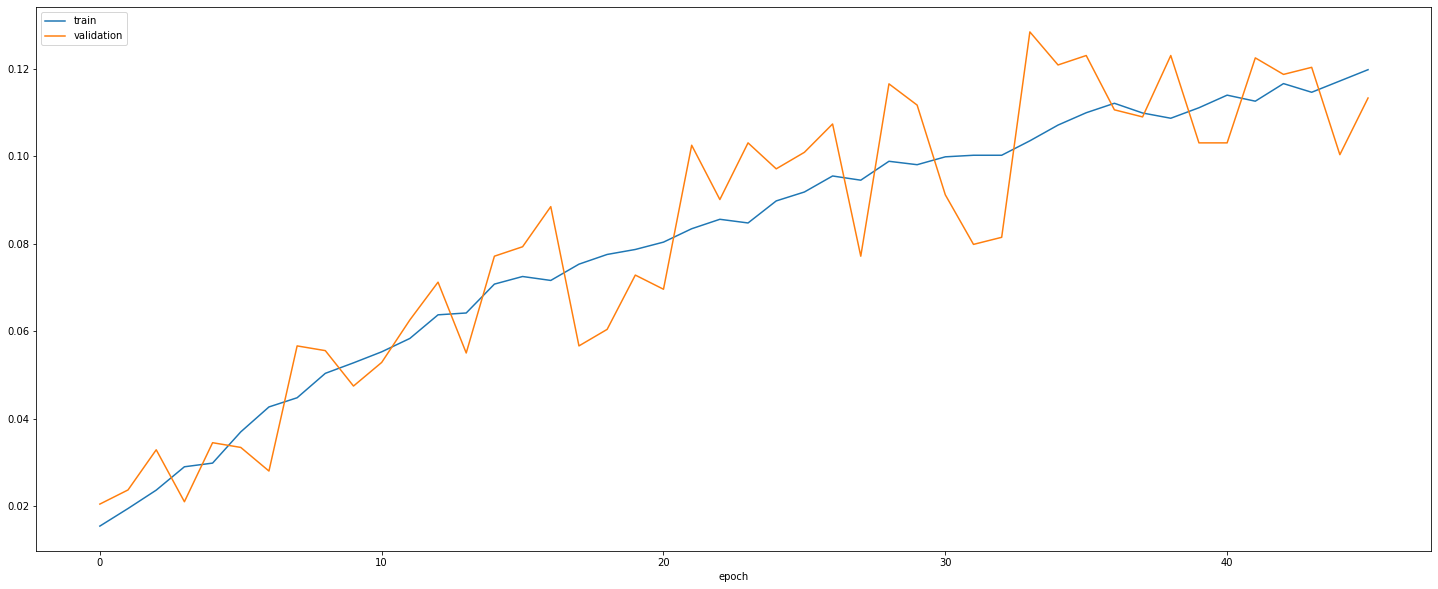

In [41]:
fig = plt.figure(figsize=(25, 10))
plt.plot(CNN.history['accuracy'])
plt.plot(CNN.history['val_accuracy'])
plt.legend(['train', 'validation'], loc='upper left')
plt.xlabel('epoch')
plt.show()

# Partie 4 : Modèles VGG16

In [26]:
train_datagen = ImageDataGenerator(rotation_range=40,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode="nearest",
                                   preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

In [27]:
from keras.applications.vgg16 import VGG16
vgg_model = VGG16(weights='imagenet', include_top=False,
                  input_shape=(224, 224, 3))

In [41]:
for layer in vgg_model.layers:
    layer.trainable = False
# Make sure you have frozen the correct layers
for i, layer in enumerate(vgg_model.layers):
    print(i, layer.name, layer.trainable)

0 input_4 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False


In [42]:
x = vgg_model.output
x = Flatten()(x)  # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(num_breeds, activation='softmax')(x)  # Softmax for multiclass
vgg_16 = Model(inputs=vgg_model.input, outputs=x)

In [45]:
learning_rate = 1e-4
vgg_16.compile(loss="sparse_categorical_crossentropy",
               optimizer=keras.optimizers.Adam(lr=learning_rate), metrics=["accuracy"])
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir, histogram_freq=1)

fit_vgg = vgg_16.fit(train_datagen.flow(x_train, y_train, batch_size=8),
                     validation_data=val_datagen.flow(
    x_val, y_val, batch_size=8),
    epochs=20,
    shuffle=True,
    verbose=1,
    callbacks=[tensorboard_callback])

Epoch 1/20
2084/2084 [==============================] - 125s 59ms/step - loss: 5.7941 - accuracy: 0.0115 - val_loss: 4.7733 - val_accuracy: 0.0189
Epoch 2/20
2084/2084 [==============================] - 124s 60ms/step - loss: 4.7913 - accuracy: 0.0142 - val_loss: 4.6949 - val_accuracy: 0.0103
Epoch 3/20
2084/2084 [==============================] - 125s 60ms/step - loss: 4.7356 - accuracy: 0.0158 - val_loss: 4.6378 - val_accuracy: 0.0119
Epoch 4/20
2084/2084 [==============================] - 126s 60ms/step - loss: 4.7164 - accuracy: 0.0151 - val_loss: 4.5614 - val_accuracy: 0.0151
Epoch 5/20
2084/2084 [==============================] - 138s 66ms/step - loss: 4.7061 - accuracy: 0.0144 - val_loss: 4.5708 - val_accuracy: 0.0189
Epoch 6/20
2084/2084 [==============================] - 127s 61ms/step - loss: 4.6905 - accuracy: 0.0151 - val_loss: 4.5591 - val_accuracy: 0.0205
Epoch 7/20
2084/2084 [==============================] - 113s 54ms/step - loss: 4.6927 - accuracy: 0.0142 - val_loss: 4

In [28]:
def model_vgg16(hp):

    vgg_model = VGG16(weights='imagenet', include_top=False,
                      input_shape=(224, 224, 3))

    for layer in vgg_model.layers:
        layer.trainable = False

    x = vgg_model.output
    x = Flatten()(x)  # Flatten dimensions to for use in FC layers

    hp_units = hp.Int('units', min_value=256, max_value=512, step=128)
    x = Dense(units=hp_units, activation='relu')(x)

    rate = hp.Float('dropout_2', min_value=0.0,
                    max_value=0.5, default=0.25, step=0.1)
    x = Dropout(rate)(x)  # Dropout layer to reduce overfitting

    hp_units_2 = hp.Int('units_2', min_value=128, max_value=256, step=128)
    x = Dense(hp_units_2, activation='relu')(x)

    x = Dense(num_breeds, activation='softmax')(x)  # Softmax for multiclass
    vgg_16 = Model(inputs=vgg_model.input, outputs=x)

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])

    vgg_16.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                   loss=keras.losses.SparseCategoricalCrossentropy(
                       from_logits=True),
                   metrics=['accuracy'])

    return vgg_16

In [29]:
tuner_vgg16 = kt.Hyperband(model_vgg16,
                           objective='val_accuracy',
                           max_epochs=10,
                           overwrite=True)

In [30]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

In [56]:
tuner_vgg16.search(train_datagen.flow(x_train, y_train, batch_size=4),
                   epochs=50,
                   validation_data=val_datagen.flow(
                       x_val, y_val, batch_size=4),
                   callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps_vgg16 = tuner_vgg16.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps_vgg16.get('units')} and the optimal learning rate for the optimizer
is {best_hps_vgg16.get('learning_rate')}.
""")

Trial 30 Complete [00h 28m 28s]
val_accuracy: 0.09929843246936798

Best val_accuracy So Far: 0.2719913721084595
Total elapsed time: 04h 49m 11s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 384 and the optimal learning rate for the optimizer
is 1e-05.



In [32]:
best_hps_vgg16.values

{'units': 384,
 'dropout_2': 0.0,
 'units_2': 256,
 'learning_rate': 1e-05,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 4,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '1f95596609c1a82ee95f309c33291d23'}

In [58]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner_vgg16.hypermodel.build(best_hps_vgg16)
history_vgg16 = model.fit(train_datagen.flow(x_train, y_train, batch_size=4),
                          epochs=50, validation_data=val_datagen.flow(x_val, y_val, batch_size=4))

Epoch 1/50
4168/4168 [==============================] - 167s 40ms/step - loss: 7.7552 - accuracy: 0.0150 - val_loss: 5.1232 - val_accuracy: 0.0270
Epoch 2/50
4168/4168 [==============================] - 157s 38ms/step - loss: 4.7944 - accuracy: 0.0219 - val_loss: 4.6957 - val_accuracy: 0.0448
Epoch 3/50
4168/4168 [==============================] - 165s 39ms/step - loss: 4.6048 - accuracy: 0.0427 - val_loss: 4.3981 - val_accuracy: 0.0777
Epoch 4/50
4168/4168 [==============================] - 182s 44ms/step - loss: 4.3602 - accuracy: 0.0668 - val_loss: 4.0593 - val_accuracy: 0.1106
Epoch 5/50
4168/4168 [==============================] - 168s 40ms/step - loss: 4.0414 - accuracy: 0.1048 - val_loss: 3.7748 - val_accuracy: 0.1516
Epoch 6/50
4168/4168 [==============================] - 164s 39ms/step - loss: 3.7524 - accuracy: 0.1407 - val_loss: 3.4964 - val_accuracy: 0.1873
Epoch 7/50
4168/4168 [==============================] - 171s 41ms/step - loss: 3.5344 - accuracy: 0.1655 - val_loss: 3

In [59]:
val_acc_per_epoch = history_vgg16.history['val_accuracy']
best_epoch_vgg16 = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch_vgg16,))

Best epoch: 45


In [34]:
hypermodel_vgg16 = tuner_vgg16.hypermodel.build(best_hps_vgg16)

# Retrain the model
vgg16 = hypermodel_vgg16.fit(train_datagen.flow(x_train, y_train, batch_size=4),
                             epochs=best_epoch_vgg16, validation_data=val_datagen.flow(x_val, y_val, batch_size=4))

Epoch 1/45


C:\Users\antoi\miniconda3\envs\Test\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


4168/4168 [==============================] - 123s 28ms/step - loss: 7.8296 - accuracy: 0.0137 - val_loss: 5.1325 - val_accuracy: 0.0210
Epoch 2/45
4168/4168 [==============================] - 115s 28ms/step - loss: 4.8211 - accuracy: 0.0159 - val_loss: 4.7970 - val_accuracy: 0.0313
Epoch 3/45
4168/4168 [==============================] - 114s 27ms/step - loss: 4.6709 - accuracy: 0.0388 - val_loss: 4.5390 - val_accuracy: 0.0664
Epoch 4/45
4168/4168 [==============================] - 154s 37ms/step - loss: 4.3796 - accuracy: 0.0745 - val_loss: 4.1852 - val_accuracy: 0.1128
Epoch 5/45
4168/4168 [==============================] - 157s 38ms/step - loss: 4.0461 - accuracy: 0.1080 - val_loss: 3.8556 - val_accuracy: 0.1662
Epoch 6/45
4168/4168 [==============================] - 154s 37ms/step - loss: 3.7526 - accuracy: 0.1365 - val_loss: 3.4923 - val_accuracy: 0.2126
Epoch 7/45
4168/4168 [==============================] - 160s 38ms/step - loss: 3.4881 - accuracy: 0.1817 - val_loss: 3.2246 - val

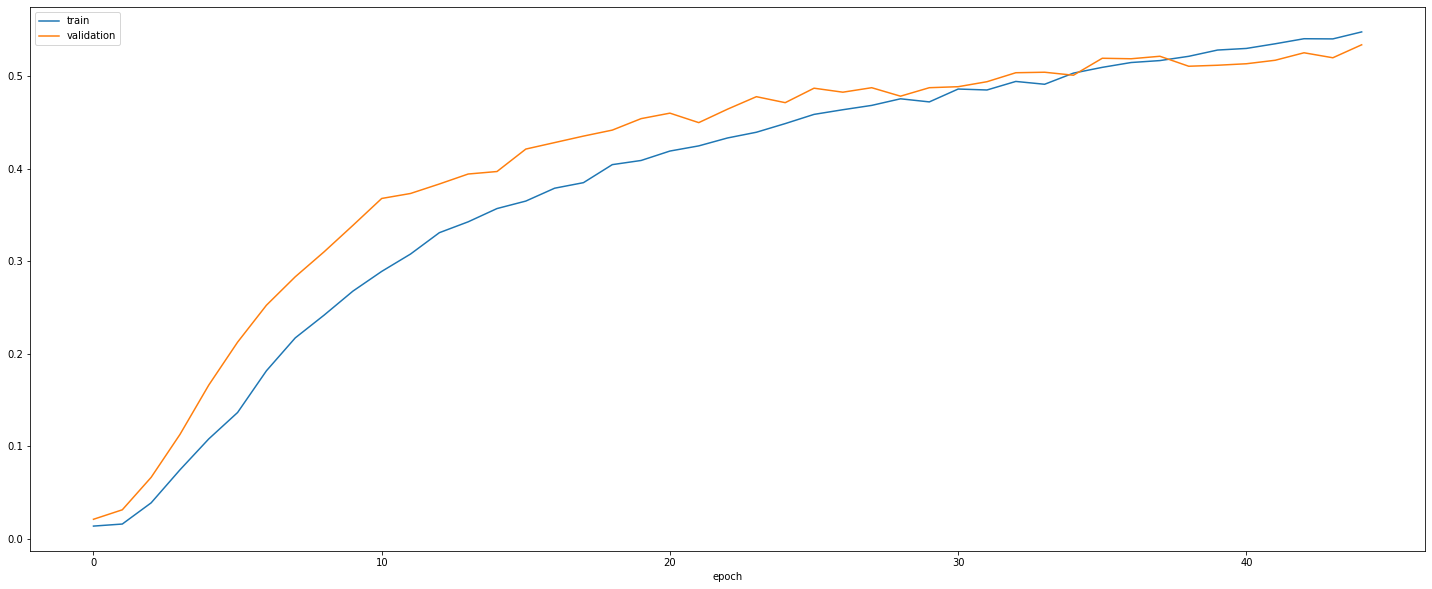

In [112]:
fig = plt.figure(figsize=(25, 10))
plt.plot(vgg16.history['accuracy'])
plt.plot(vgg16.history['val_accuracy'])
plt.legend(['train', 'validation'], loc='upper left')
plt.xlabel('epoch')
plt.show()

In [227]:
vgg_model_total = VGG16(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

In [249]:
l = []
y = []

for element in tqdm(x_train):
    x = element.reshape((1, 224, 224, 3))
    l.append(np.reshape(vgg_model_total(x),(512*7*7,)))

100%|███████████████████████████████████████████████████████████████████████████| 16669/16669 [01:52<00:00, 147.89it/s]


In [259]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=100, max_features= None, bootstrap=True, max_samples=0.9)

In [255]:
x_train_reshape = np.array(l)

In [257]:
x_train_reshape.shape

(16669, 25088)

In [260]:
rf.fit(x_train_reshape,y_train)

RandomForestClassifier(max_depth=100, max_features=None, max_samples=0.9)

In [262]:
y_pred_reshape = rf.predict(x_train_reshape)

In [265]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_reshape,y_train)

0.012058311836342912

# Partie 5 : Modèles Inceptionv3

In [64]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# create the base pre-trained model
base_model = InceptionV3(
    weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

In [65]:
x = base_model.output
x = Flatten()(x)  # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.1)(x)  # Dropout layer to reduce overfitting
x = Dense(128, activation='relu')(x)
x = Dense(num_breeds, activation='softmax')(x)  # Softmax for multiclass
inception_v3 = Model(inputs=base_model.input, outputs=x)

In [24]:
train_datagen = ImageDataGenerator(rotation_range=40,
                                   zoom_range=0.2, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2,
                                   horizontal_flip=True, 
                                   fill_mode="nearest", 
                                   preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)
val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)

In [67]:
learning_rate = 1e-4
inception_v3.compile(loss="sparse_categorical_crossentropy",
               optimizer=keras.optimizers.Adam(lr=learning_rate), metrics=["accuracy"])

inception_v3.fit(train_datagen.flow(x_train, y_train, batch_size=1), validation_data=val_datagen.flow(x_val, y_val, batch_size=1),
                     epochs=20, shuffle=True)

Epoch 1/20
16669/16669 [==============================] - 580s 35ms/step - loss: 2.8028 - accuracy: 0.3660 - val_loss: 1.7639 - val_accuracy: 0.5575
Epoch 2/20
16669/16669 [==============================] - 661s 40ms/step - loss: 1.9701 - accuracy: 0.5093 - val_loss: 1.6146 - val_accuracy: 0.5834
Epoch 3/20
16669/16669 [==============================] - 592s 35ms/step - loss: 1.7791 - accuracy: 0.5439 - val_loss: 1.4971 - val_accuracy: 0.6114
Epoch 4/20
16669/16669 [==============================] - 610s 37ms/step - loss: 1.6894 - accuracy: 0.5637 - val_loss: 1.4475 - val_accuracy: 0.6298
Epoch 5/20
16669/16669 [==============================] - 657s 39ms/step - loss: 1.6436 - accuracy: 0.5715 - val_loss: 1.4135 - val_accuracy: 0.6363
Epoch 6/20
16669/16669 [==============================] - 625s 37ms/step - loss: 1.6021 - accuracy: 0.5805 - val_loss: 1.4451 - val_accuracy: 0.6174
Epoch 7/20
16669/16669 [==============================] - 572s 34ms/step - loss: 1.5655 - accuracy: 0.5909

In [70]:
def model_inceptionv3(hp):
    
    inceptionv3_model = InceptionV3(weights='imagenet',include_top=False, input_shape=(224, 224, 3))
    
    for layer in inceptionv3_model.layers:
        layer.trainable = False
    
    x = inceptionv3_model.output
    x = Flatten()(x) # Flatten dimensions to for use in FC layers
    
    hp_units = hp.Int('units', min_value=256, max_value=512, step=128)
    x = Dense(units=hp_units, activation='relu')(x)
    
    rate=hp.Float('dropout_2', min_value=0.0, max_value=0.3, step=0.1)
    x = Dropout(rate)(x) # Dropout layer to reduce overfitting
    
    hp_units_2 = hp.Int('units_2', min_value=128, max_value=256, step=128)
    x = Dense(hp_units_2, activation='relu')(x)
    
    x = Dense(num_breeds, activation='softmax')(x) # Softmax for multiclass
    inceptionv3 = Model(inputs=inceptionv3_model.input, outputs=x)

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])

    inceptionv3.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

    return inceptionv3

In [71]:
tuner_inceptionv3 = kt.Hyperband(model_inceptionv3,
                     objective='val_accuracy',
                     max_epochs=10,
                     overwrite=True)

In [72]:
tuner_inceptionv3.search(train_datagen.flow(x_train, y_train, batch_size=1),
                         epochs=50,
                         validation_data=val_datagen.flow(
                             x_val, y_val, batch_size=1),
                         callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps_inceptionv3 = tuner_inceptionv3.get_best_hyperparameters(num_trials=1)[
    0]

print(f"""
The hyperparameter search is complete. The optimal learning rate for the optimizer
is {best_hps_inceptionv3.get('learning_rate')}.
""")

Trial 30 Complete [01h 17m 28s]
val_accuracy: 0.43173232674598694

Best val_accuracy So Far: 0.6109012365341187
Total elapsed time: 20h 15m 14s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal learning rate for the optimizer
is 0.0001.



In [65]:
def model_inceptionv3_bis(hp):

    inceptionv3_model = InceptionV3(
        weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    for layer in inceptionv3_model.layers:
        layer.trainable = False

    x = inceptionv3_model.output
    x = Flatten()(x)  # Flatten dimensions to for use in FC layers

    hp_units = hp.Int('units', min_value=512, max_value=512, step=128)
    x = Dense(units=hp_units, activation='relu')(x)

    rate = hp.Float('dropout_2', min_value=0.0, max_value=0.2, step=0.1)
    x = Dropout(rate)(x)  # Dropout layer to reduce overfitting

    hp_units_2 = hp.Int('units_2', min_value=128, max_value=128, step=128)
    x = Dense(hp_units_2, activation='relu')(x)

    x = Dense(num_breeds, activation='softmax')(x)  # Softmax for multiclass
    inceptionv3 = Model(inputs=inceptionv3_model.input, outputs=x)

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-4, 1e-5])

    inceptionv3.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                        loss=keras.losses.SparseCategoricalCrossentropy(
                            from_logits=True),
                        metrics=['accuracy'])

    return inceptionv3

In [66]:
tuner_inceptionv3_bis = kt.Hyperband(model_inceptionv3_bis,
                                     objective='val_accuracy',
                                     max_epochs=10,
                                     overwrite=True)

In [67]:
tuner_inceptionv3_bis.search(train_datagen.flow(x_train, y_train, batch_size=1),
                             epochs=50,
                             validation_data=val_datagen.flow(
                                 x_val, y_val, batch_size=1),
                             callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps_inceptionv3 = tuner_inceptionv3_bis.get_best_hyperparameters(num_trials=1)[
    0]

print(f"""
The hyperparameter search is complete. The optimal learning rate for the optimizer
is {best_hps_inceptionv3.get('learning_rate')}.
""")

Trial 6 Complete [00h 15m 24s]
val_accuracy: 0.6416621804237366

Best val_accuracy So Far: 0.648138165473938
Total elapsed time: 01h 28m 39s
INFO:tensorflow:Oracle triggered exit


NameError: name 'best_hps_inceptionv3_bis' is not defined

In [68]:
# Get the optimal hyperparameters
best_hps_inceptionv3 = tuner_inceptionv3_bis.get_best_hyperparameters(num_trials=1)[
    0]

print(f"""
The hyperparameter search is complete. The optimal learning rate for the optimizer
is {best_hps_inceptionv3.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal learning rate for the optimizer
is 1e-05.



In [69]:
best_hps_inceptionv3.values

{'units': 512,
 'dropout_2': 0.2,
 'units_2': 128,
 'learning_rate': 1e-05,
 'tuner/epochs': 2,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 2,
 'tuner/round': 0}

In [71]:
# Build the model with the optimal hyperparameters and train it on the data for 100 epochs
model = tuner_inceptionv3.hypermodel.build(best_hps_inceptionv3)
history_inceptionv3 = model.fit(train_datagen.flow(x_train, y_train, batch_size=1),
                                epochs=50, validation_data=val_datagen.flow(x_val, y_val, batch_size=1), shuffle=True)

Epoch 1/100
16669/16669 [==============================] - 497s 30ms/step - loss: 2.6038 - accuracy: 0.4190 - val_loss: 1.5502 - val_accuracy: 0.6314
Epoch 2/100
16669/16669 [==============================] - 537s 32ms/step - loss: 1.7648 - accuracy: 0.5718 - val_loss: 1.3966 - val_accuracy: 0.6460
Epoch 3/100
16669/16669 [==============================] - 482s 29ms/step - loss: 1.6099 - accuracy: 0.5984 - val_loss: 1.3111 - val_accuracy: 0.6606
Epoch 4/100
16669/16669 [==============================] - 559s 34ms/step - loss: 1.5154 - accuracy: 0.6122 - val_loss: 1.2933 - val_accuracy: 0.6870
Epoch 5/100
16669/16669 [==============================] - 522s 31ms/step - loss: 1.4477 - accuracy: 0.6282 - val_loss: 1.3277 - val_accuracy: 0.6552
Epoch 6/100
16669/16669 [==============================] - 425s 25ms/step - loss: 1.4039 - accuracy: 0.6367 - val_loss: 1.2515 - val_accuracy: 0.6821
Epoch 7/100
16669/16669 [==============================] - 422s 25ms/step - loss: 1.3516 - accuracy:

KeyboardInterrupt: 

In [74]:
val_acc_per_epoch = history_inceptionv3.history['val_accuracy']
best_epoch_inceptionv3 = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch_inceptionv3,))

Best epoch: 26


In [76]:
hypermodel_inceptionv3 = tuner_inceptionv3.hypermodel.build(
    best_hps_inceptionv3)

# Retrain the model
inceptionv3 = hypermodel_inceptionv3.fit(train_datagen.flow(
    x_train, y_train, batch_size=1), epochs=best_epoch_inceptionv3, validation_data=val_datagen.flow(x_val, y_val, batch_size=1), shuffle=True)

Epoch 1/26
16669/16669 [==============================] - 617s 37ms/step - loss: 2.5989 - accuracy: 0.4233 - val_loss: 1.4912 - val_accuracy: 0.6314
Epoch 2/26
16669/16669 [==============================] - 609s 37ms/step - loss: 1.7891 - accuracy: 0.5690 - val_loss: 1.3484 - val_accuracy: 0.6557
Epoch 3/26
16669/16669 [==============================] - 607s 36ms/step - loss: 1.6211 - accuracy: 0.6014 - val_loss: 1.3104 - val_accuracy: 0.6692
Epoch 4/26
16669/16669 [==============================] - 499s 30ms/step - loss: 1.5095 - accuracy: 0.6225 - val_loss: 1.3048 - val_accuracy: 0.6611
Epoch 5/26
16669/16669 [==============================] - 483s 29ms/step - loss: 1.4365 - accuracy: 0.6303 - val_loss: 1.3138 - val_accuracy: 0.6616
Epoch 6/26
16669/16669 [==============================] - 485s 29ms/step - loss: 1.3854 - accuracy: 0.6392 - val_loss: 1.2995 - val_accuracy: 0.6686
Epoch 7/26
16669/16669 [==============================] - 487s 29ms/step - loss: 1.3253 - accuracy: 0.6502

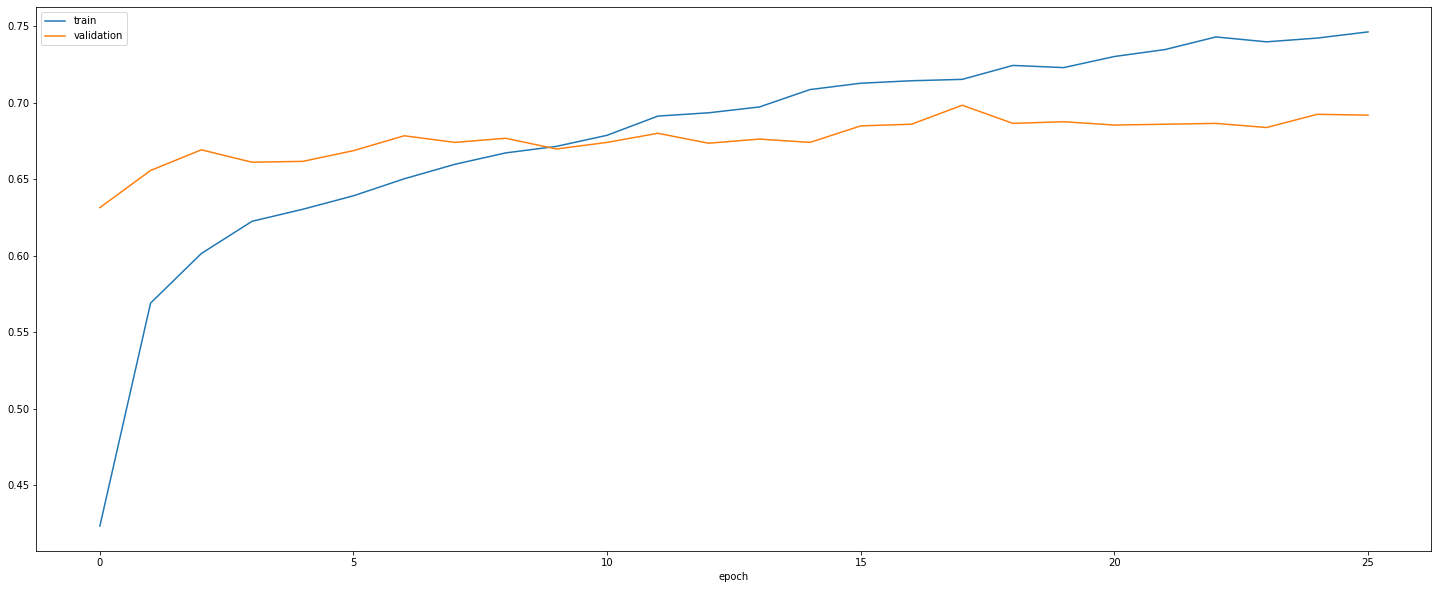

In [77]:
fig = plt.figure(figsize=(25, 10))
plt.plot(inceptionv3.history['accuracy'])
plt.plot(inceptionv3.history['val_accuracy'])
plt.legend(['train', 'validation'], loc='upper left')
plt.xlabel('epoch')
plt.show()

In [25]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

inception_test = InceptionV3(
    weights='imagenet', include_top=False, input_shape=(224, 224, 3))

nb_layers = 196

# Make sure you have frozen the correct layers
for i, layer in enumerate(inception_test.layers):
    if i < nb_layers:
        layer.trainable = False
    else:
        layer.trainable = True

In [26]:
for i, layer in enumerate(inception_test.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 conv2d False
2 batch_normalization False
3 activation False
4 conv2d_1 False
5 batch_normalization_1 False
6 activation_1 False
7 conv2d_2 False
8 batch_normalization_2 False
9 activation_2 False
10 max_pooling2d False
11 conv2d_3 False
12 batch_normalization_3 False
13 activation_3 False
14 conv2d_4 False
15 batch_normalization_4 False
16 activation_4 False
17 max_pooling2d_1 False
18 conv2d_8 False
19 batch_normalization_8 False
20 activation_8 False
21 conv2d_6 False
22 conv2d_9 False
23 batch_normalization_6 False
24 batch_normalization_9 False
25 activation_6 False
26 activation_9 False
27 average_pooling2d False
28 conv2d_5 False
29 conv2d_7 False
30 conv2d_10 False
31 conv2d_11 False
32 batch_normalization_5 False
33 batch_normalization_7 False
34 batch_normalization_10 False
35 batch_normalization_11 False
36 activation_5 False
37 activation_7 False
38 activation_10 False
39 activation_11 False
40 mixed0 False
41 conv2d_15 False
42 batch_normalization_15 False

In [27]:
x = inception_test.output
x = Flatten()(x)  # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.1)(x)  # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(num_breeds, activation='softmax')(x)  # Softmax for multiclass
inceptionv3_test = Model(inputs=inception_test.input, outputs=x)

In [28]:
learning_rate = 1e-5
inceptionv3_test.compile(loss="sparse_categorical_crossentropy",
                         optimizer=keras.optimizers.Adam(learning_rate=learning_rate), metrics=["accuracy"])

inceptionv3_test.fit(train_datagen.flow(x_train, y_train, batch_size=8), validation_data=val_datagen.flow(x_val, y_val, batch_size=8),
                     epochs=20, shuffle=True)

Epoch 1/20
2084/2084 [==============================] - 140s 62ms/step - loss: 3.3988 - accuracy: 0.2475 - val_loss: 1.5368 - val_accuracy: 0.5926
Epoch 2/20
2084/2084 [==============================] - 116s 56ms/step - loss: 2.0676 - accuracy: 0.4757 - val_loss: 1.2936 - val_accuracy: 0.6568
Epoch 3/20
2084/2084 [==============================] - 116s 56ms/step - loss: 1.7584 - accuracy: 0.5413 - val_loss: 1.2215 - val_accuracy: 0.6746
Epoch 4/20
2084/2084 [==============================] - 127s 61ms/step - loss: 1.5831 - accuracy: 0.5804 - val_loss: 1.1634 - val_accuracy: 0.6859
Epoch 5/20
2084/2084 [==============================] - 131s 63ms/step - loss: 1.4509 - accuracy: 0.6098 - val_loss: 1.2095 - val_accuracy: 0.6843
Epoch 6/20
2084/2084 [==============================] - 133s 64ms/step - loss: 1.3500 - accuracy: 0.6328 - val_loss: 1.1570 - val_accuracy: 0.7043
Epoch 7/20
2084/2084 [==============================] - 132s 63ms/step - loss: 1.2607 - accuracy: 0.6501 - val_loss: 1

In [30]:
def model_inceptionv3_test(hp):

    inceptionv3_model = InceptionV3(
        weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    nb_layers = 196

    # Make sure you have frozen the correct layers
    for i, layer in enumerate(inception_test.layers):
        if i < nb_layers:
            layer.trainable = False
        else:
            layer.trainable = True

    x = inceptionv3_model.output
    x = Flatten()(x)  # Flatten dimensions to for use in FC layers

    hp_units = hp.Int('units', min_value=256, max_value=512, step=128)
    x = Dense(units=hp_units, activation='relu')(x)

    rate = hp.Float('dropout_2', min_value=0.0, max_value=0.3, step=0.1)
    x = Dropout(rate)(x)  # Dropout layer to reduce overfitting

    hp_units_2 = hp.Int('units_2', min_value=128, max_value=128, step=256)
    x = Dense(hp_units_2, activation='relu')(x)

    x = Dense(num_breeds, activation='softmax')(x)  # Softmax for multiclass
    inceptionv3_test = Model(inputs=inceptionv3_model.input, outputs=x)

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-4, 1e-5, 1e-6])

    inceptionv3_test.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                             loss=keras.losses.SparseCategoricalCrossentropy(
                                 from_logits=True),
                             metrics=['accuracy'])

    return inceptionv3_test

In [33]:
tuner_inceptionv3_test = kt.Hyperband(model_inceptionv3_test,
                                      objective='val_accuracy',
                                      max_epochs=10,
                                      overwrite=True)

In [34]:
tuner_inceptionv3_test.search(train_datagen.flow(x_train, y_train, batch_size=8),
                              epochs=50,
                              validation_data=val_datagen.flow(
                                  x_val, y_val, batch_size=8),
                              callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps_inceptionv3_test = tuner_inceptionv3_test.get_best_hyperparameters(
    num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal learning rate for the optimizer
is {best_hps_inceptionv3_test.get('learning_rate')}.
""")

Trial 30 Complete [00h 27m 24s]
val_accuracy: 0.513221800327301

Best val_accuracy So Far: 0.7355639338493347
Total elapsed time: 05h 48m 32s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal learning rate for the optimizer
is 1e-05.



In [35]:
# Build the model with the optimal hyperparameters and train it on the data for 100 epochs
model_test = tuner_inceptionv3_test.hypermodel.build(best_hps_inceptionv3_test)
history_inceptionv3_test = model_test.fit(train_datagen.flow(
    x_train, y_train, batch_size=8), epochs=25, validation_data=val_datagen.flow(x_val, y_val, batch_size=8), shuffle=True)

Epoch 1/25
2084/2084 [==============================] - 151s 69ms/step - loss: 4.4722 - accuracy: 0.0607 - val_loss: 3.1985 - val_accuracy: 0.3443
Epoch 2/25
2084/2084 [==============================] - 159s 76ms/step - loss: 3.3412 - accuracy: 0.2502 - val_loss: 1.8252 - val_accuracy: 0.5526
Epoch 3/25
2084/2084 [==============================] - 169s 81ms/step - loss: 2.6001 - accuracy: 0.3880 - val_loss: 1.4008 - val_accuracy: 0.6379
Epoch 4/25
2084/2084 [==============================] - 169s 81ms/step - loss: 2.1853 - accuracy: 0.4663 - val_loss: 1.2467 - val_accuracy: 0.6713
Epoch 5/25
2084/2084 [==============================] - 173s 83ms/step - loss: 1.8994 - accuracy: 0.5288 - val_loss: 1.1961 - val_accuracy: 0.6897
Epoch 6/25
2084/2084 [==============================] - 216s 104ms/step - loss: 1.7190 - accuracy: 0.5648 - val_loss: 1.1433 - val_accuracy: 0.7059
Epoch 7/25
2084/2084 [==============================] - 213s 102ms/step - loss: 1.5682 - accuracy: 0.5935 - val_loss:

In [36]:
val_acc_per_epoch = history_inceptionv3_test.history['val_accuracy']
best_epoch_inceptionv3_test = val_acc_per_epoch.index(
    max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch_inceptionv3_test,))

Best epoch: 20


In [37]:
hypermodel_inceptionv3_test = tuner_inceptionv3_test.hypermodel.build(
    best_hps_inceptionv3_test)

# Retrain the model
inceptionv3_test = hypermodel_inceptionv3_test.fit(train_datagen.flow(
    x_train, y_train, batch_size=8), epochs=best_epoch_inceptionv3_test, validation_data=val_datagen.flow(x_val, y_val, batch_size=8), shuffle=True)

Epoch 1/20
2084/2084 [==============================] - 170s 78ms/step - loss: 4.4675 - accuracy: 0.0603 - val_loss: 3.1742 - val_accuracy: 0.3314
Epoch 2/20
2084/2084 [==============================] - 150s 72ms/step - loss: 3.3839 - accuracy: 0.2435 - val_loss: 1.8364 - val_accuracy: 0.5510
Epoch 3/20
2084/2084 [==============================] - 149s 72ms/step - loss: 2.5901 - accuracy: 0.3842 - val_loss: 1.3997 - val_accuracy: 0.6228
Epoch 4/20
2084/2084 [==============================] - 149s 71ms/step - loss: 2.1751 - accuracy: 0.4667 - val_loss: 1.2752 - val_accuracy: 0.6643
Epoch 5/20
2084/2084 [==============================] - 150s 72ms/step - loss: 1.9086 - accuracy: 0.5268 - val_loss: 1.1948 - val_accuracy: 0.6897
Epoch 6/20
2084/2084 [==============================] - 150s 72ms/step - loss: 1.7093 - accuracy: 0.5672 - val_loss: 1.1534 - val_accuracy: 0.7037
Epoch 7/20
2084/2084 [==============================] - 149s 72ms/step - loss: 1.5614 - accuracy: 0.6005 - val_loss: 1

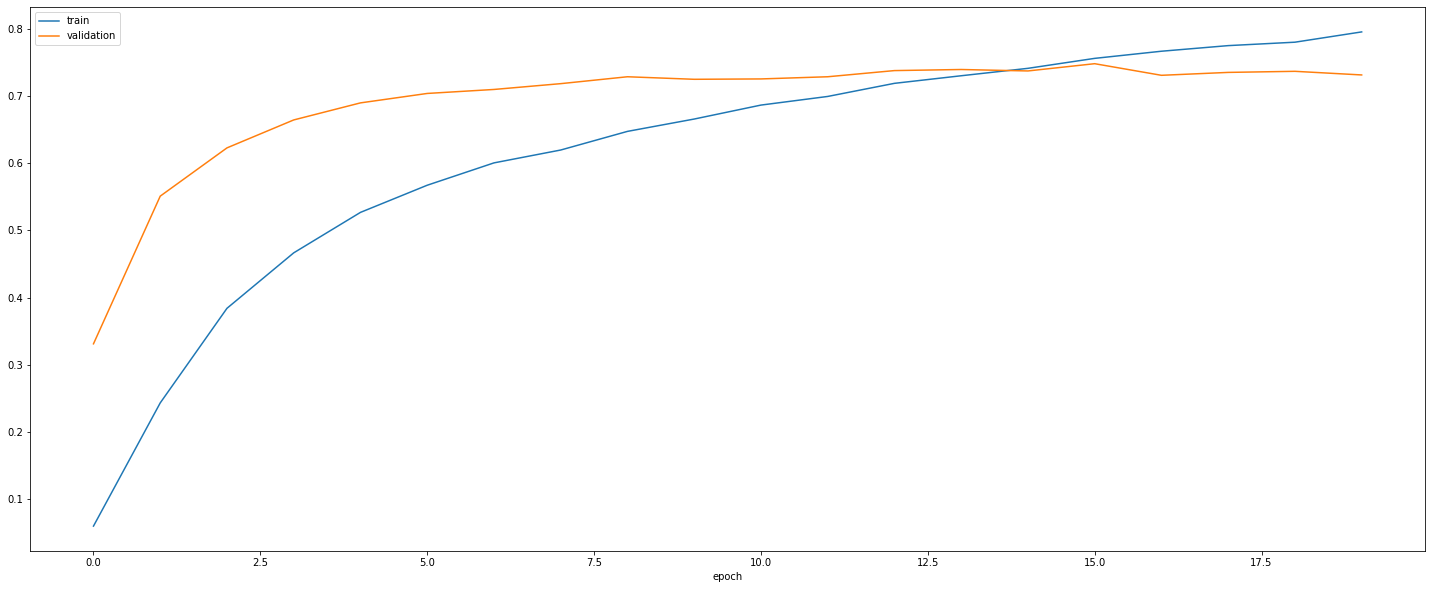

In [38]:
fig = plt.figure(figsize=(25, 10))
plt.plot(inceptionv3_test.history['accuracy'])
plt.plot(inceptionv3_test.history['val_accuracy'])
plt.legend(['train', 'validation'], loc='upper left')
plt.xlabel('epoch')
plt.show()

# Partie 6 : Sauvegarde des modèles

In [89]:
# On sauvegarde les différents estimateur

import pickle

Estimator = {
    "Encoder": encoder
}
pickle.dump(Estimator, open("process.p", "wb"))

In [49]:
CNN.model.save('CNN_model.h5')

In [48]:
vgg16.save('vgg16_model.h5')

In [87]:
inceptionv3.model.save('inceptionv3_model.h5')

In [62]:
inceptionv3_test.model.save('inceptionv3_bis_model.h5')

In [50]:
CNN = load_model('CNN_model.h5')

In [51]:
vgg16 = load_model('vgg16_model.h5')

In [52]:
inceptionv3 = load_model('inceptionv3_model.h5')

In [53]:
inceptionv3_test = load_model('inceptionv3_bis_model.h5')

# Partie 7 : Evaluation sur les données Tests

In [54]:
test_datagen = ImageDataGenerator()

In [55]:
y_pred_cnn = CNN.predict(test_datagen.flow(x_test, y_test, batch_size=8, shuffle=False))

In [56]:
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_cnn, y_test)

0.10787172011661808

In [60]:
test_datagen = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input)

In [62]:
y_pred_vgg = vgg16.predict(test_datagen.flow(x_test, y_test, batch_size=4, shuffle=False))

In [63]:
y_pred_vgg = np.argmax(y_pred_vgg, axis=1)

In [64]:
accuracy_score(y_pred_vgg, y_test)

0.5145772594752187

In [65]:
test_datagen = ImageDataGenerator(preprocessing_function = tf.keras.applications.inception_v3.preprocess_input)

In [66]:
y_pred_inception = inceptionv3.predict(test_datagen.flow(x_test, y_test, batch_size=1, shuffle=False))

In [67]:
y_pred_inception_test = inceptionv3_test.predict(test_datagen.flow(x_test, y_test, batch_size=8, shuffle=False))

In [68]:
y_pred_inception = np.argmax(y_pred_inception, axis=1)

In [69]:
y_pred_inception_test = np.argmax(y_pred_inception_test, axis=1)

In [70]:
accuracy_score(y_pred_inception,y_test)

0.6885325558794947

In [71]:
accuracy_score(y_pred_inception_test,y_test)

0.7405247813411079

In [72]:
Score_test = pd.DataFrame(index=["F1", "Recall", "Precision",
                          "Accuracy"])

In [73]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

score = []
score.append(f1_score(y_test, y_pred_vgg, average='weighted'))
score.append(recall_score(y_test, y_pred_vgg, average='weighted'))
score.append(precision_score(y_test, y_pred_vgg, average='weighted'))
score.append(accuracy_score(y_test, y_pred_vgg))

Score_test['VGG'] = score

In [74]:
score = []
score.append(f1_score(y_test, y_pred_cnn, average='weighted'))
score.append(recall_score(y_test, y_pred_cnn, average='weighted'))
score.append(precision_score(y_test, y_pred_cnn, average='weighted'))
score.append(accuracy_score(y_test, y_pred_cnn))

Score_test['CNN'] = score

C:\Users\antoi\miniconda3\envs\Test\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
score = []
score.append(f1_score(y_test, y_pred_inception, average='weighted'))
score.append(recall_score(y_test, y_pred_inception, average='weighted'))
score.append(precision_score(y_test, y_pred_inception, average='weighted'))
score.append(accuracy_score(y_test, y_pred_inception))

Score_test['Inceptionv3'] = score

In [76]:
score = []
score.append(f1_score(y_test, y_pred_inception_test, average='weighted'))
score.append(recall_score(y_test, y_pred_inception_test, average='weighted'))
score.append(precision_score(
    y_test, y_pred_inception_test, average='weighted'))
score.append(accuracy_score(y_test, y_pred_inception_test))

Score_test['Inceptionv3_bis'] = score

<AxesSubplot:>

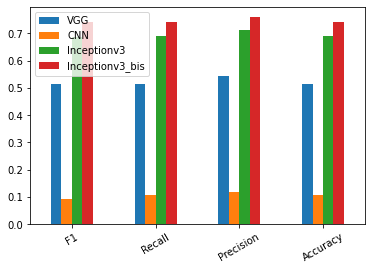

In [77]:
Score_test.plot(kind="bar", rot=30)

In [98]:
y_test_s = encoder.inverse_transform(y_test)

In [99]:
from sklearn.metrics import classification_report

In [100]:
print(classification_report(
    y_test, y_pred_vgg, 
    target_names=sorted(set(y_test_s))))

                                precision    recall  f1-score   support

                  Afghan_hound       0.57      0.81      0.67        16
           African_hunting_dog       0.92      0.71      0.80        17
                      Airedale       0.47      0.54      0.50        13
American_Staffordshire_terrier       0.29      0.33      0.31        12
                   Appenzeller       0.24      0.33      0.28        12
            Australian_terrier       0.42      0.44      0.43        18
            Bedlington_terrier       0.77      0.71      0.74        14
          Bernese_mountain_dog       0.53      0.59      0.56        17
              Blenheim_spaniel       0.87      0.76      0.81        17
                 Border_collie       0.46      0.40      0.43        15
                Border_terrier       0.88      0.41      0.56        17
                   Boston_bull       0.74      0.83      0.78        24
          Bouvier_des_Flandres       0.60      0.27      0.37  

In [101]:
print(classification_report(
    y_test, y_pred_inception, 
    target_names=sorted(set(y_test_s))))

                                precision    recall  f1-score   support

                  Afghan_hound       0.89      1.00      0.94        16
           African_hunting_dog       0.88      0.82      0.85        17
                      Airedale       0.75      0.92      0.83        13
American_Staffordshire_terrier       0.25      0.25      0.25        12
                   Appenzeller       0.50      0.58      0.54        12
            Australian_terrier       0.47      0.44      0.46        18
            Bedlington_terrier       0.76      0.93      0.84        14
          Bernese_mountain_dog       0.69      0.53      0.60        17
              Blenheim_spaniel       0.87      0.76      0.81        17
                 Border_collie       0.50      0.53      0.52        15
                Border_terrier       0.67      0.71      0.69        17
                   Boston_bull       0.70      0.96      0.81        24
          Bouvier_des_Flandres       0.89      0.73      0.80  

In [102]:
print(classification_report(
    y_test, y_pred_inception_test, 
    target_names=sorted(set(y_test_s))))

                                precision    recall  f1-score   support

                  Afghan_hound       0.80      1.00      0.89        16
           African_hunting_dog       1.00      0.94      0.97        17
                      Airedale       0.85      0.85      0.85        13
American_Staffordshire_terrier       0.43      0.25      0.32        12
                   Appenzeller       0.80      0.33      0.47        12
            Australian_terrier       0.58      0.61      0.59        18
            Bedlington_terrier       0.92      0.79      0.85        14
          Bernese_mountain_dog       0.64      0.94      0.76        17
              Blenheim_spaniel       0.93      0.76      0.84        17
                 Border_collie       0.65      0.73      0.69        15
                Border_terrier       0.81      0.76      0.79        17
                   Boston_bull       0.68      0.88      0.76        24
          Bouvier_des_Flandres       0.80      0.73      0.76  